In [1]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
from src.pocet_stran import pocet_stran
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [94]:
df = df[df['rok'] >= 1990]

In [4]:
df = df.drop_duplicates(subset=['100_a','245_a'], keep='first')

In [5]:
df = df.dropna(subset=['700_a','700_4','700_7']).explode(['700_a','700_4','700_7'])

In [8]:
df = df[df['700_4'] == 'trl']

In [13]:
df.explode('041_h').groupby('041_h').size().nlargest(20)

041_h
eng    38046
ger    15950
fre     7255
rus     6571
cze     2561
pol     1938
ita     1870
slo     1713
spa     1462
lat      897
swe      878
hun      526
dut      503
und      475
nor      462
dan      359
grc      335
chi      303
jpn      296
bul      295
dtype: int64

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
def create_genre_correlation_matrix(df):
    """
    Create a correlation matrix showing relationships between genres based on shared authors.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with columns '100_7' (author codes) and '072_x' (genres)
    
    Returns:
    pandas.DataFrame: Correlation matrix of genres
    """
    # First, we need to explode the genre lists to get one row per author-genre pair
    df_exploded = df.explode('041_h')
    
    # Create a pivot table where:
    # - Rows are author codes
    # - Columns are genres
    # - Values are 1 if the author writes in that genre, 0 if not
    genre_matrix = pd.crosstab(
        df_exploded['700_7'],
        df_exploded['041_h']
    )
    
    # Calculate the correlation matrix
    correlation_matrix = genre_matrix.corr()
    
    # Round to 2 decimal places for readability
    correlation_matrix = correlation_matrix.round(2)
    
    return correlation_matrix

def plot_correlation_heatmap(correlation_matrix, figsize=(20, 16), cmap='RdBu_r'):
    """
    Create a heatmap visualization of the correlation matrix.
    
    Parameters:
    correlation_matrix (pandas.DataFrame): The correlation matrix to visualize
    figsize (tuple): Figure size in inches (width, height)
    cmap (str): Color map to use (default: 'RdBu_r' for red-blue diverging)
    
    Returns:
    matplotlib.figure.Figure: The generated figure
    """
    # Create figure and axes
    plt.figure(figsize=figsize)
    
    # Create heatmap
    sns.heatmap(
        correlation_matrix,
        annot=True,  # Show correlation values
        cmap=cmap,   # Color scheme
        center=0,    # Center the colormap at 0
        vmin=-1,     # Minimum correlation value
        vmax=1,      # Maximum correlation value
        square=True, # Make cells square
        fmt='.2f',   # Format for correlation values
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    
    # Customize the plot
    plt.title('Ze kterých jazyků překládají stejní lidé', pad=20)
    plt.tight_layout()
    
    return plt.gcf()

def analyze_and_visualize_genres(df, plot_kwargs=None):
    """
    Complete analysis function that creates the correlation matrix and visualizes it.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame with author and genre information
    plot_kwargs (dict): Optional kwargs for plot customization
    
    Returns:
    tuple: (correlation_matrix, figure)
    """
    # Default plot parameters
    if plot_kwargs is None:
        plot_kwargs = {}
    
    # Create correlation matrix
    corr_matrix = create_genre_correlation_matrix(df)
    
    # Create visualization
    fig = plot_correlation_heatmap(corr_matrix, **plot_kwargs)
    
    return corr_matrix, fig

# Example usage:
"""
# Assuming your DataFrame is called 'df':

# Basic usage
corr_matrix, fig = analyze_and_visualize_genres(df)
plt.show()

# Customized visualization
custom_params = {
    'figsize': (15, 12),
    'cmap': 'viridis'  # Alternative color scheme
}
corr_matrix, fig = analyze_and_visualize_genres(df, plot_kwargs=custom_params)
plt.show()
"""

"\n# Assuming your DataFrame is called 'df':\n\n# Basic usage\ncorr_matrix, fig = analyze_and_visualize_genres(df)\nplt.show()\n\n# Customized visualization\ncustom_params = {\n    'figsize': (15, 12),\n    'cmap': 'viridis'  # Alternative color scheme\n}\ncorr_matrix, fig = analyze_and_visualize_genres(df, plot_kwargs=custom_params)\nplt.show()\n"

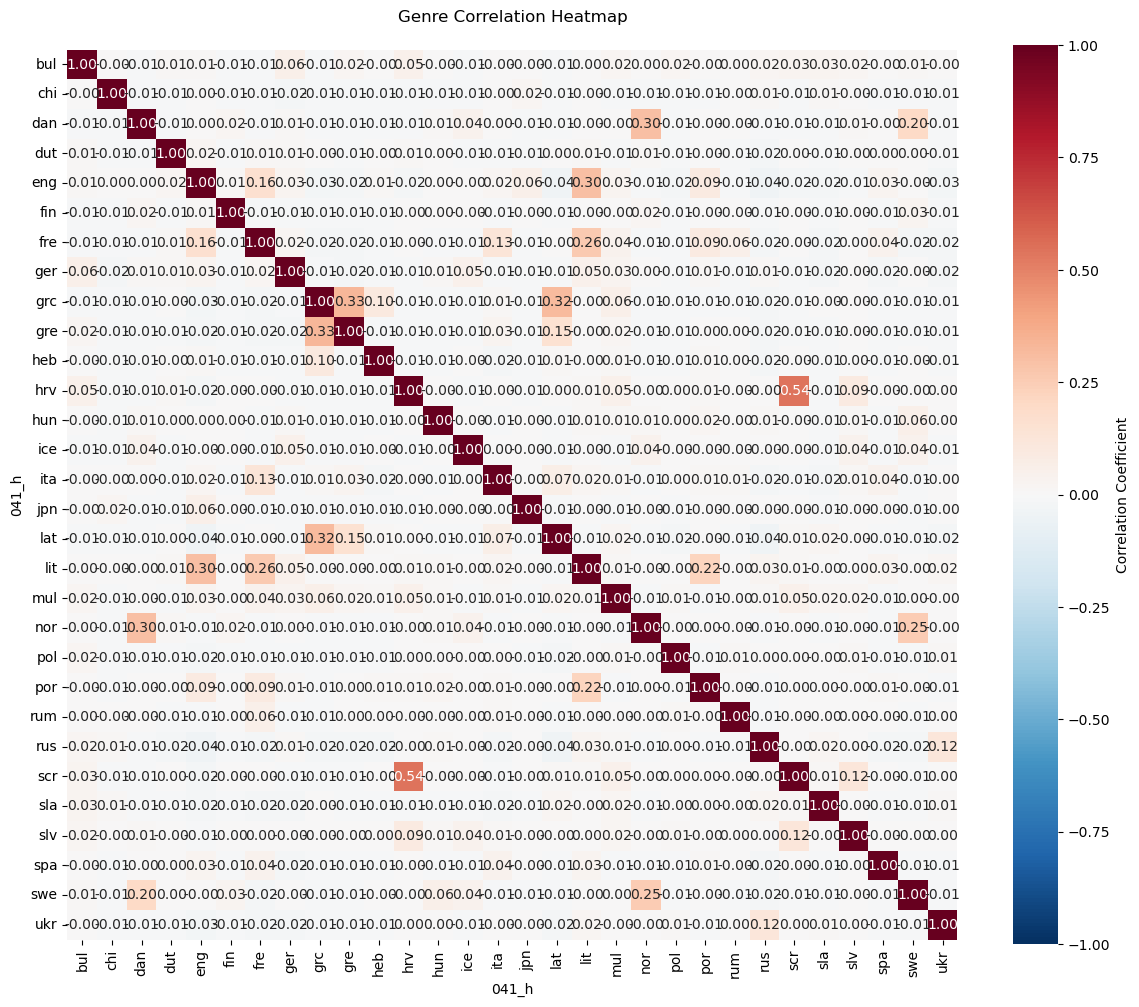

In [64]:
df_expl = df.explode('041_h')
df_filtr = df_expl[~df_expl['041_h'].isin(['cze','und','slo'])]
nejpilnejsi = df_filtr.groupby("700_7")['041_h'].nunique()
nejpilnejsi = nejpilnejsi[nejpilnejsi >= 2].index.to_list()
df_filtr = df_filtr[df_filtr['700_7'].isin(nejpilnejsi)]
nejcastejsi = df_filtr.groupby('041_h').size().nlargest(30).index.to_list()
df_filtr = df_filtr[df_filtr['041_h'].isin(nejcastejsi)]
corr_matrix, fig = analyze_and_visualize_genres(df_filtr)
plt.show()

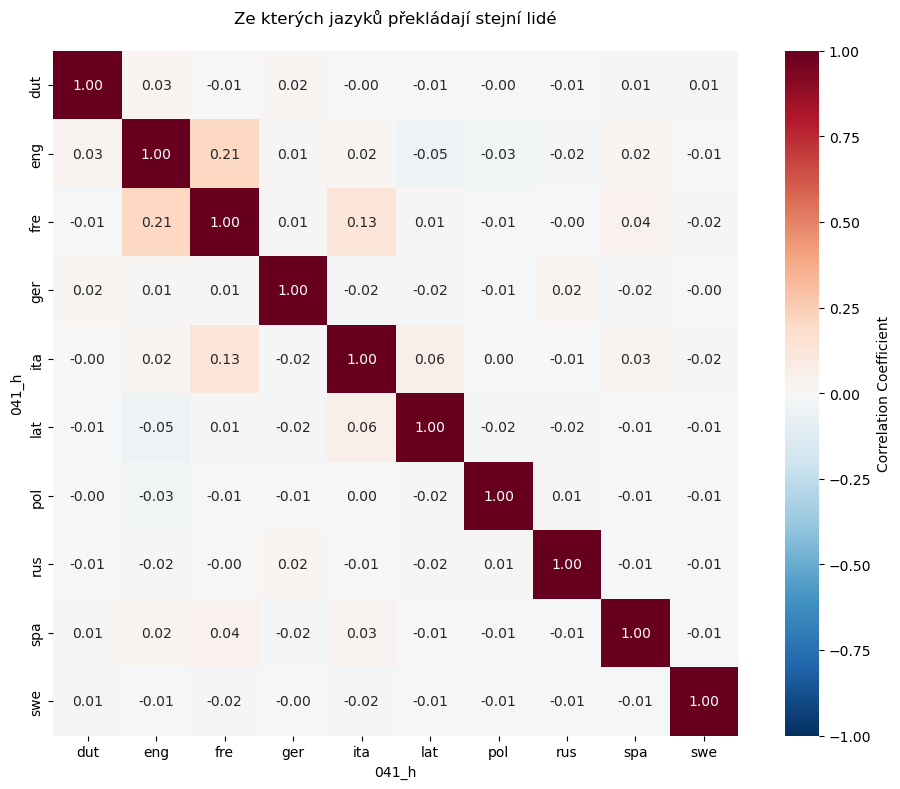

In [96]:
df_expl = df.explode('041_h')
df_filtr = df_expl[~df_expl['041_h'].isin(['cze','und','slo'])]
nejpilnejsi = df_filtr.groupby("700_7")['041_h'].nunique()
nejpilnejsi = nejpilnejsi[nejpilnejsi >= 2].index.to_list()
df_filtr = df_filtr[df_filtr['700_7'].isin(nejpilnejsi)]
nejcastejsi = df_filtr.groupby('041_h').size().nlargest(10).index.to_list()
df_filtr = df_filtr[df_filtr['041_h'].isin(nejcastejsi)]
corr_matrix, fig = analyze_and_visualize_genres(df_filtr)
plt.show()

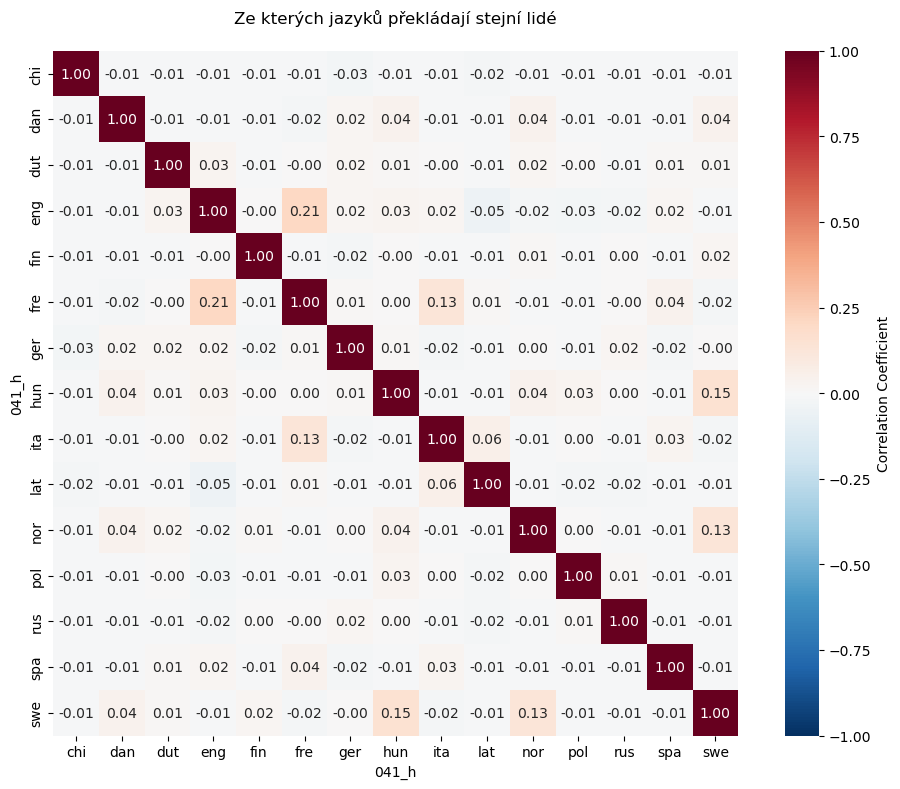

In [98]:
df_filtr = df_expl[~df_expl['041_h'].isin(['cze','und','slo'])]
nejpilnejsi = df_filtr.groupby("700_7")['041_h'].nunique()
nejpilnejsi = nejpilnejsi[nejpilnejsi >= 2].index.to_list()
df_filtr = df_filtr[df_filtr['700_7'].isin(nejpilnejsi)]
nejcastejsi = df_filtr.groupby('041_h').size().nlargest(15).index.to_list()
df_filtr = df_filtr[df_filtr['041_h'].isin(nejcastejsi)]
corr_matrix, fig = analyze_and_visualize_genres(df_filtr)
plt.show()

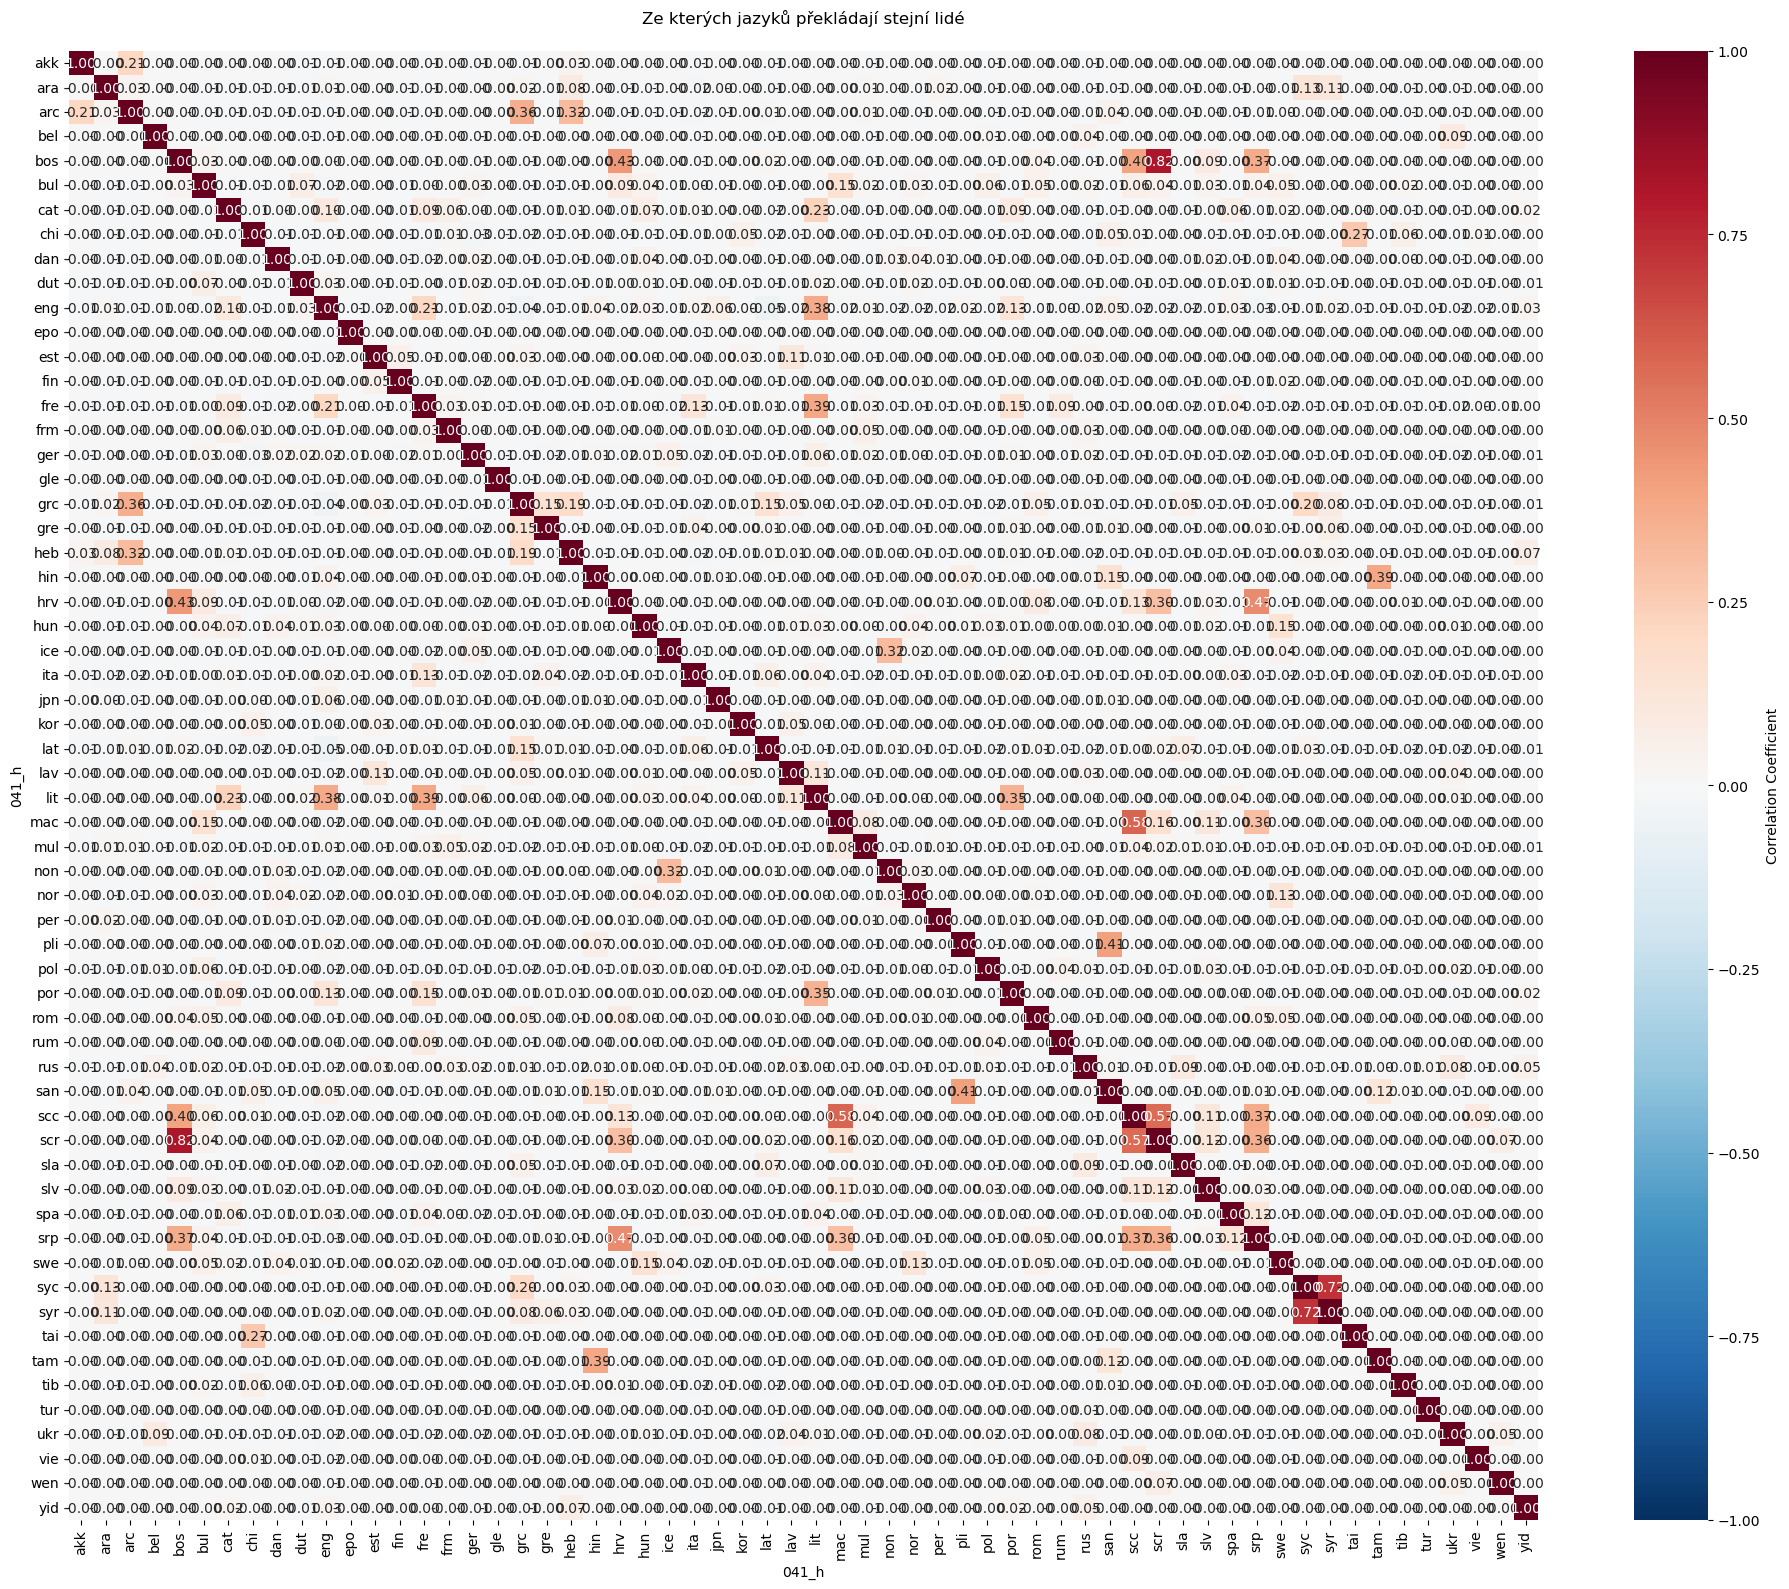

In [110]:
df_filtr = df_expl[~df_expl['041_h'].isin(['cze','und','slo'])]
nejpilnejsi = df_filtr.groupby("700_7")['041_h'].nunique()
nejpilnejsi = nejpilnejsi[nejpilnejsi >= 2].index.to_list()
df_filtr = df_filtr[df_filtr['700_7'].isin(nejpilnejsi)]
nejcastejsi = df_filtr.groupby('041_h').size().nlargest(60).index.to_list()
df_filtr = df_filtr[df_filtr['041_h'].isin(nejcastejsi)]
corr_matrix, fig = analyze_and_visualize_genres(df_filtr)
plt.show()

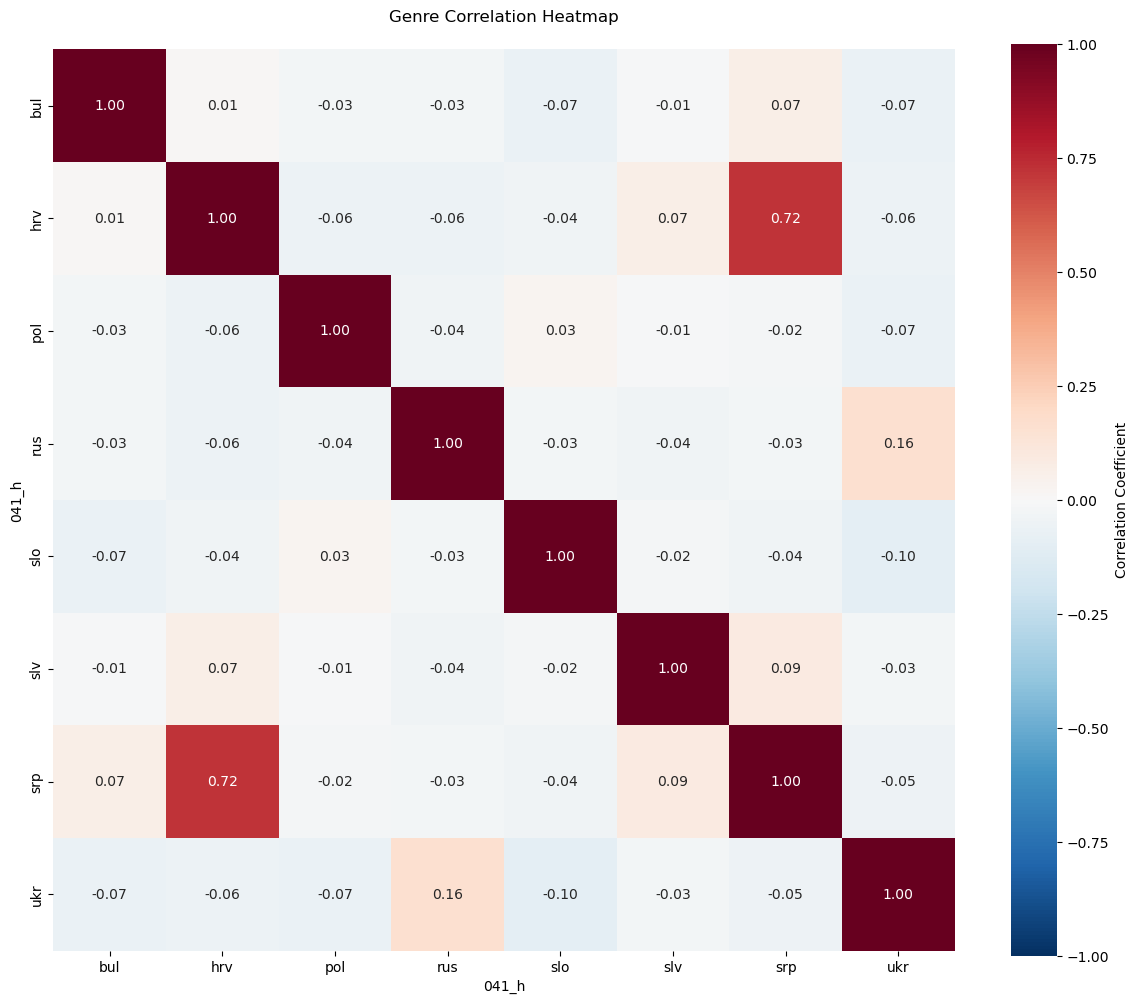

In [74]:
df_filtr = df_expl[df_expl['041_h'].isin(['rus','ukr','pol','slo','slv','srp','hrv','bul'])]
nejpilnejsi = df_filtr.groupby("700_7")['041_h'].nunique()
nejpilnejsi = nejpilnejsi[nejpilnejsi >= 2].index.to_list()
df_filtr = df_filtr[df_filtr['700_7'].isin(nejpilnejsi)]
nejcastejsi = df_filtr.groupby('041_h').size().nlargest(40).index.to_list()
df_filtr = df_filtr[df_filtr['041_h'].isin(nejcastejsi)]
corr_matrix, fig = analyze_and_visualize_genres(df_filtr)
plt.show()